In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
from scipy.stats import skew,kurtosis

In [2]:
data = pd.read_csv(r"C:\Users\Nitish\Desktop\Backup\Python\insurance.csv")

In [3]:
data.shape

(1338, 7)

In [4]:
pp.ProfileReport(data)

In [5]:
data = data.drop_duplicates(data.columns).reset_index(drop = True)

In [6]:
data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
age         1337 non-null int64
sex         1337 non-null object
bmi         1337 non-null float64
children    1337 non-null int64
smoker      1337 non-null object
region      1337 non-null object
charges     1337 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 286.3 KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.smoker = np.where(data.smoker=='no', 0,data.smoker)
data.smoker = np.where(data.smoker=='yes', 1,data.smoker)

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [11]:
data.sex = np.where(data.sex == 'male',1,0)

In [12]:
data.sex=data.sex.apply(pd.to_numeric,errors='coerce')

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [14]:
from sklearn.preprocessing import LabelEncoder
n_southeast = LabelEncoder()
n_southwest = LabelEncoder()
n_northeast = LabelEncoder()
n_northwest = LabelEncoder()

In [15]:
data['SouthEast'] = n_southeast.fit_transform(data['region'])
data['SouthWest'] = n_southwest.fit_transform(data['region'])
data['NorthEast'] = n_northeast.fit_transform(data['region'])
data['NorthWest'] = n_northwest.fit_transform(data['region'])

In [16]:
data = data.drop(['region'],axis = 1)

In [17]:
data.head()

,age,sex,bmi,children,smoker,charges,SouthEast,SouthWest,NorthEast,NorthWest
0,19,0,27.900,0,1,16884.92400,3,3,3,3
1,18,1,33.770,1,0,1725.55230,2,2,2,2
2,28,1,33.000,3,0,4449.46200,2,2,2,2
3,33,1,22.705,0,0,21984.47061,1,1,1,1
4,32,1,28.880,0,0,3866.85520,1,1,1,1


In [18]:
data = data[['age', 'sex', 'bmi', 'children','smoker','SouthEast','SouthWest','NorthEast','NorthWest','charges']]

In [19]:
data.head()

,age,sex,bmi,children,smoker,SouthEast,SouthWest,NorthEast,NorthWest,charges
0,19,0,27.900,0,1,3,3,3,3,16884.92400
1,18,1,33.770,1,0,2,2,2,2,1725.55230
2,28,1,33.000,3,0,2,2,2,2,4449.46200
3,33,1,22.705,0,0,1,1,1,1,21984.47061
4,32,1,28.880,0,0,1,1,1,1,3866.85520


In [20]:
X = data.iloc[:,[0,1,2,3,4,5,6,7,8]]
y = data.iloc[:,9:]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
simplelinearregression = LinearRegression()
simplelinearregression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
y_predict = simplelinearregression.predict(X_test)

In [54]:
p = simplelinearregression.predict([[19,0,27.900,0,1,3,3,3,3]])

In [55]:
p

array([[24739.90045487]])

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test,y_prediction)

0.8068466322629114

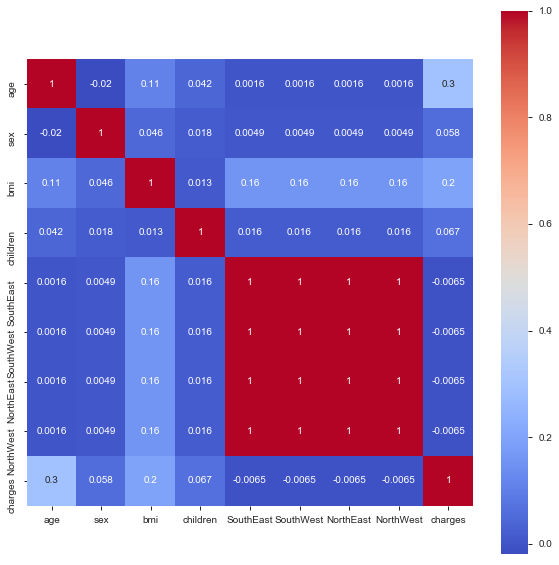

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,square=True,cmap='coolwarm')

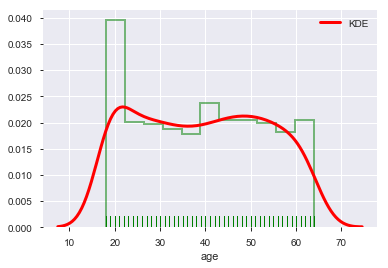

In [30]:
sns.distplot(data.age, rug=True, rug_kws={"color": "g"},
...                   kde_kws={"color": "r", "lw": 3, "label": "KDE"},
...                   hist_kws={"histtype": "step", "linewidth": 2,
...                             "alpha": 0.5, "color": "g"})

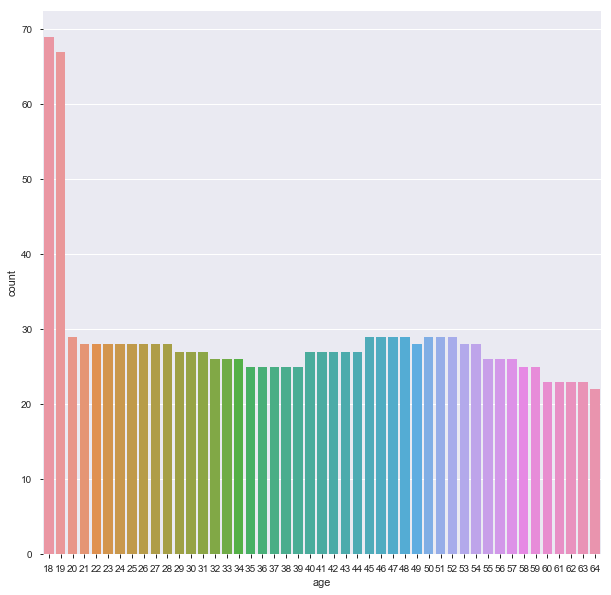

In [38]:
plt.figure(figsize=(10,10))
sns.countplot(data.age)

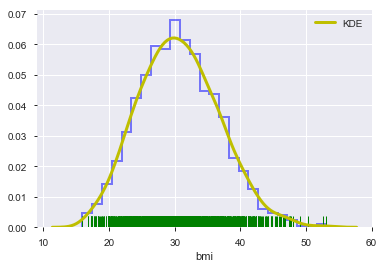

In [33]:
sns.distplot(data.bmi, rug=True, rug_kws={"color": "g"},
...                   kde_kws={"color": "y", "lw": 3, "label": "KDE"},
...                   hist_kws={"histtype": "step", "linewidth": 2,
...                             "alpha": 0.5, "color": "b"})

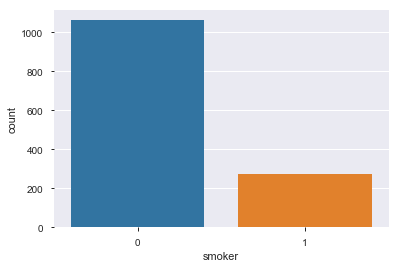

In [34]:
sns.countplot(data.smoker)

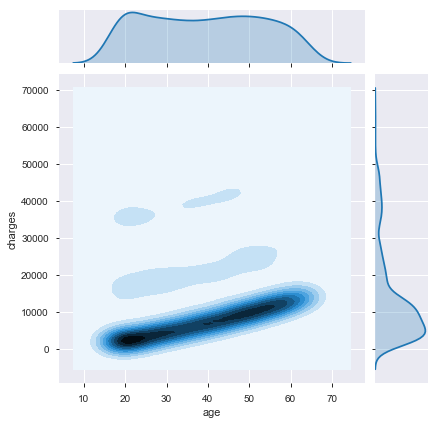

In [35]:
sns.jointplot(data.age,data.charges,kind='kde')

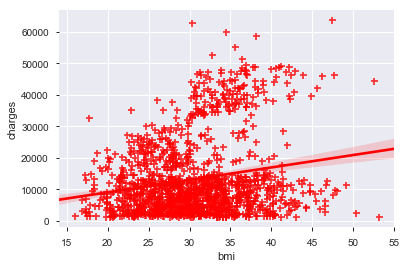

In [36]:
sns.regplot(data.bmi,data.charges,color='r',marker='+')

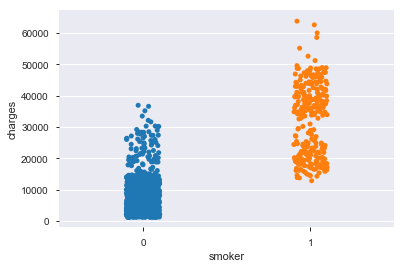

In [37]:
sns.stripplot(data.smoker,data.charges,jitter=True)